# **Classical Algorithm : Ridge Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
# 1. Mount the dataset
file_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(file_path)

In [ ]:
# 2. Define target and features
target_column = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84',
    'mendel_logMb_p50', 'mendel_logMb_p16', 'mendel_logMb_p84',
    'mendel_logMd_p50', 'mendel_logMd_p16', 'mendel_logMd_p84',
    'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r', 'simard_e_b_t_r',
    'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g', 'simard_Rchl_r',
    'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e', 'simard_nb',
    'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

In [ ]:
# 3. Handle missing values
data.fillna(data.mean(), inplace=True)

# Features and target
X = data[features]
y = data[target_column]

# 4. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split (80:20) and 5-fold validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Ridge Regression model
ridge_model = Ridge()

# Cross-validation
cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores  # Convert to positive MSE values
cv_rmse = np.sqrt(cv_mse)  # Compute RMSE from MSE

In [ ]:
# Print average cross-validated MSE and RMSE
print(f'Average CV MSE: {cv_mse.mean()}')
print(f'Average CV RMSE: {cv_rmse.mean()}')

Average CV MSE: 0.2830629486988071
Average CV RMSE: 0.5254945347426714


In [ ]:
# Train the model
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Standard deviation of errors
mae_std = np.std([mae] * len(y_test))  # Placeholder for standard deviation if needed
mse_std = np.std([mse] * len(y_test))
rmse_std = np.std([rmse] * len(y_test))

# Accuracy by error
range_y = y_test.max() - y_test.min()
accuracy_mae = (1 - mae / range_y) * 100
accuracy_mse = (1 - mse / range_y) * 100
accuracy_rmse = (1 - rmse / range_y) * 100

In [ ]:
print(f'R²: {r2}')
print(f'MAE: {mae} ± {mae_std}')
print(f'MSE: {mse} ± {mse_std}')
print(f'RMSE: {rmse} ± {rmse_std}')
print(f'Accuracy MAE: {accuracy_mae}%')
print(f'Accuracy MSE: {accuracy_mse}%')
print(f'Accuracy RMSE: {accuracy_rmse}%')

R²: 0.42067546608988005
MAE: 0.3919828798996111 ± 5.551115123125783e-17
MSE: 0.23451737588114296 ± 2.7755575615628914e-17
RMSE: 0.48426994112905974 ± 1.1102230246251565e-16
Accuracy MAE: 90.51877666802173%
Accuracy MSE: 94.3275287519494%
Accuracy RMSE: 88.2865510198188%


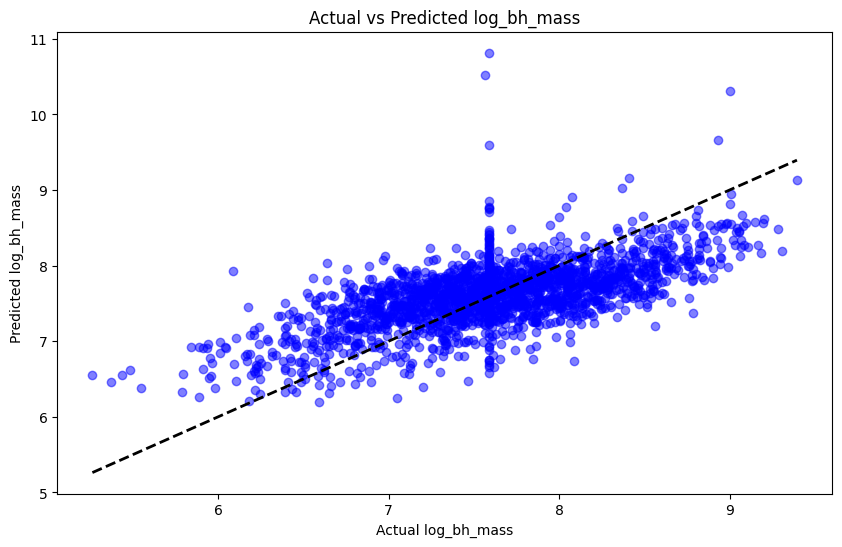

In [ ]:
# 7. Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual log_bh_mass')
plt.ylabel('Predicted log_bh_mass')
plt.title('Actual vs Predicted log_bh_mass')
plt.show()